In [1]:
# import nneded packages for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in the provided CSV
df = pd.read_csv(r"C:\Users\jhack\ALY6020\Week Four\week 4 - Nashville_housing_data.csv")

In [3]:
# check structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22651 entries, 0 to 22650
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         22651 non-null  int64  
 1   Parcel ID                          22651 non-null  object 
 2   Land Use                           22651 non-null  object 
 3   Property Address                   22649 non-null  object 
 4   Suite/ Condo   #                   0 non-null      float64
 5   Property City                      22649 non-null  object 
 6   Sale Date                          22651 non-null  object 
 7   Legal Reference                    22651 non-null  object 
 8   Sold As Vacant                     22651 non-null  object 
 9   Multiple Parcels Involved in Sale  22651 non-null  object 
 10  City                               22651 non-null  object 
 11  State                              22651 non-null  obj

In [4]:
# chcekc for null values
df.isnull().sum()

Unnamed: 0                               0
Parcel ID                                0
Land Use                                 0
Property Address                         2
Suite/ Condo   #                     22651
Property City                            2
Sale Date                                0
Legal Reference                          0
Sold As Vacant                           0
Multiple Parcels Involved in Sale        0
City                                     0
State                                    0
Acreage                                  0
Tax District                             0
Neighborhood                             0
Land Value                               0
Building Value                           0
Finished Area                            1
Foundation Type                          1
Year Built                               0
Exterior Wall                            0
Grade                                    0
Bedrooms                                 3
Full Bath  

In [5]:
# explore City vs Property City
df['City'].unique()

array(['NASHVILLE', 'ANTIOCH', 'BRENTWOOD', 'MADISON', 'OLD HICKORY',
       'HERMITAGE', 'GOODLETTSVILLE', 'JOELTON', 'WHITES CREEK',
       'MOUNT JULIET'], dtype=object)

In [6]:
df['Property City'].unique()

array(['NASHVILLE', 'ANTIOCH', 'BRENTWOOD', 'MADISON', 'OLD HICKORY',
       'HERMITAGE', 'GOODLETTSVILLE', 'JOELTON', 'WHITES CREEK',
       'MOUNT JULIET', nan], dtype=object)

In [7]:
are_identical = (df['City'] == df['Property City']).all()
print(f"Columns are identical: {are_identical}")

Columns are identical: False


In [8]:
differences = df[df['City'] != df['Property City']]
print(f"Number of differing rows: {len(differences)}")
if len(differences) > 0:
    print("Different values:")
    print(differences[['City', 'Property City']])

Number of differing rows: 3
Different values:
            City Property City
13063  NASHVILLE     BRENTWOOD
17529  NASHVILLE           NaN
17696  NASHVILLE           NaN


In [9]:
# remove unncessary columns - propety city is same as city except for 3 instances 
df = df.drop(['Property City', 'Unnamed: 0', 'Suite/ Condo   #', 'State'],axis = 1)

In [10]:
# check on distribution of null half baths
df['Half Bath'].value_counts(dropna=False)

Half Bath
0.0    16804
1.0     5409
2.0      307
NaN      108
3.0       23
Name: count, dtype: int64

In [11]:
# highly likely these should be 0
df['Half Bath'] = df['Half Bath'].fillna(0)

In [12]:
df['Half Bath'].value_counts(dropna=False)

Half Bath
0.0    16912
1.0     5409
2.0      307
3.0       23
Name: count, dtype: int64

In [13]:
# check remainang nulls
df.isnull().sum()

Parcel ID                            0
Land Use                             0
Property Address                     2
Sale Date                            0
Legal Reference                      0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
City                                 0
Acreage                              0
Tax District                         0
Neighborhood                         0
Land Value                           0
Building Value                       0
Finished Area                        1
Foundation Type                      1
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             3
Full Bath                            1
Half Bath                            0
Sale Price Compared To Value         0
dtype: int64

In [14]:
# drop remaining null values
df=df.dropna()

In [15]:
df.head()

,Parcel ID,Land Use,Property Address,Sale Date,Legal Reference,Sold As Vacant,Multiple Parcels Involved in Sale,City,Acreage,Tax District,...,Building Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Price Compared To Value
0,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,1/11/2013,20130118-0006337,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,...,134400,1149.00000,PT BSMT,1941,BRICK,C,2.0,1.0,0.0,Over
1,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,1/18/2013,20130124-0008033,No,No,NASHVILLE,0.11,CITY OF BERRY HILL,...,157800,2090.82495,SLAB,2000,BRICK/FRAME,C,3.0,2.0,1.0,Over
2,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,1/18/2013,20130128-0008863,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,...,243700,2145.60001,FULL BSMT,1948,BRICK/FRAME,B,4.0,2.0,0.0,Under
3,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,1/23/2013,20130131-0009929,No,No,NASHVILLE,0.34,URBAN SERVICES DISTRICT,...,138100,1969.00000,CRAWL,1910,FRAME,C,2.0,1.0,0.0,Under
4,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,1/4/2013,20130118-0006110,No,No,NASHVILLE,0.17,URBAN SERVICES DISTRICT,...,86100,1037.00000,CRAWL,1945,FRAME,C,2.0,1.0,0.0,Under


array([[<Axes: title={'center': 'Acreage'}>,
        <Axes: title={'center': 'Neighborhood'}>,
        <Axes: title={'center': 'Land Value'}>],
       [<Axes: title={'center': 'Building Value'}>,
        <Axes: title={'center': 'Finished Area'}>,
        <Axes: title={'center': 'Year Built'}>],
       [<Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Full Bath'}>,
        <Axes: title={'center': 'Half Bath'}>]], dtype=object)

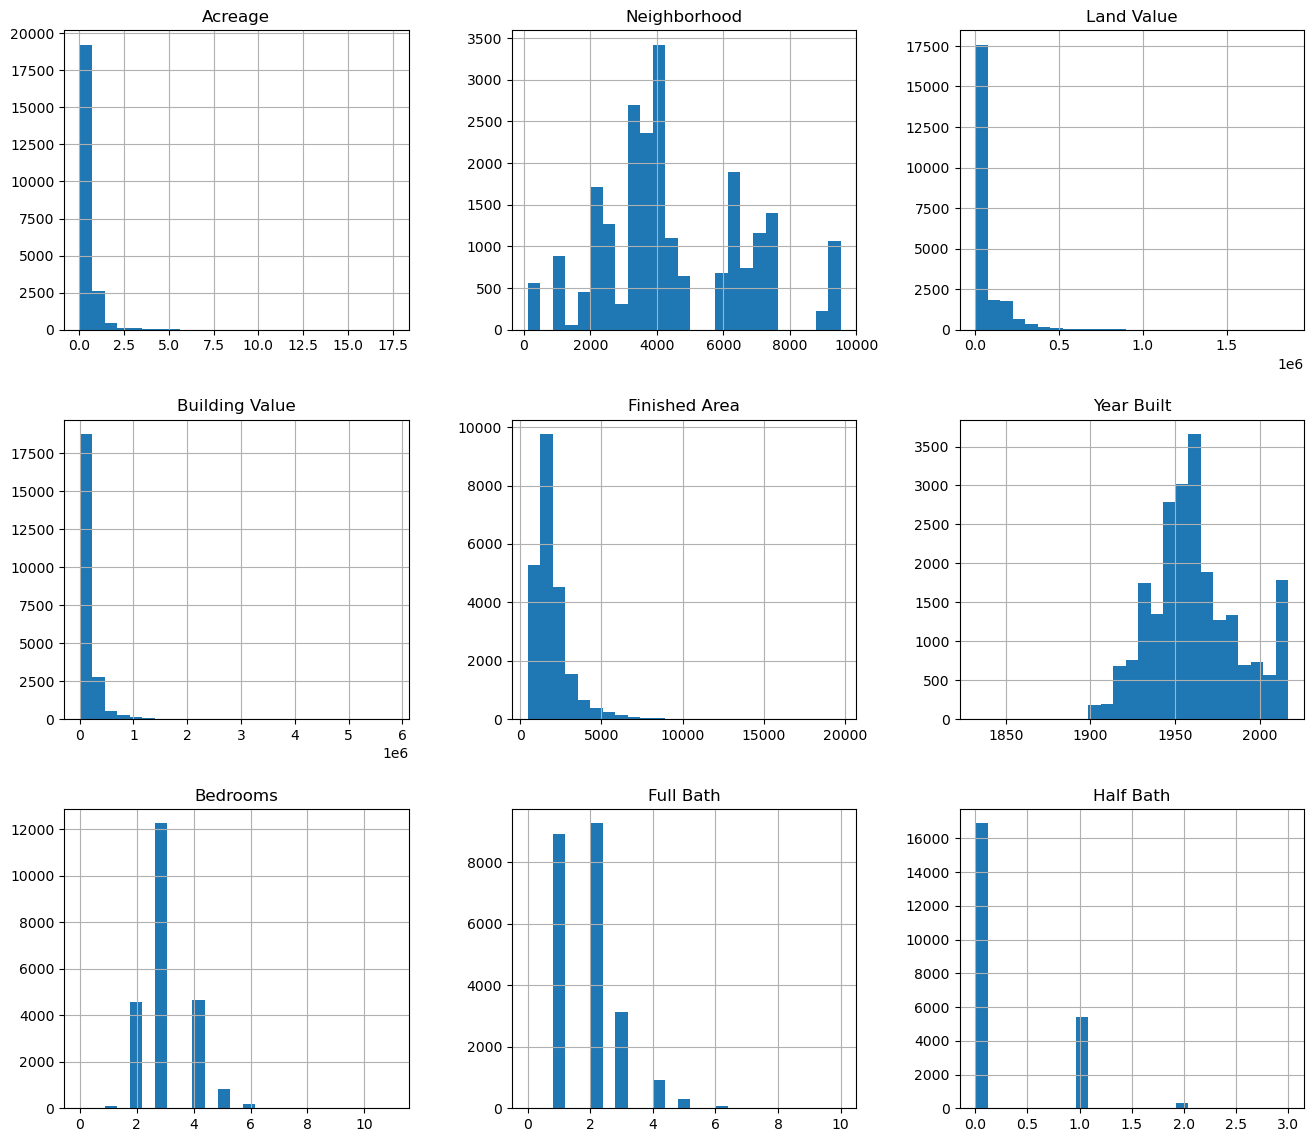

In [16]:
# distrutiuon of variables 
df.hist(figsize=(16,14),bins=25)

In [17]:
# make neiborhood categorical 
df = df.assign(Neighborhood=df['Neighborhood'].astype('category'))

In [18]:
# add binary variable for sale price comparted to value
df['Price_Over_Value_Binary'] = (df['Sale Price Compared To Value'] == 'Over').astype(int)

In [19]:
# Outlier analysis 
numerical_cols = ['Land Value', 'Building Value', 'Total_Assessed_Value', 
                 'Finished Area', 'Acreage', 'Bedrooms', 'Full Bath', 'Half Bath', 'Year Built']

In [20]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [21]:
outlier_summary = {}
for col in ['Land Value', 'Building Value', 'Total_Assessed_Value', 'Finished Area', 'Year Built']:
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'lower_bound': lower,
            'upper_bound': upper
        }
        print(f"{col}:")
        print(f"  Outliers: {len(outliers)} ({(len(outliers) / len(df)) * 100:.2f}%)")
        print(f"  Bounds: [{lower:.0f}, {upper:.0f}]")

Land Value:
  Outliers: 4189 (18.50%)
  Bounds: [-35450, 117750]
Building Value:
  Outliers: 1913 (8.45%)
  Bounds: [-68550, 342250]
Finished Area:
  Outliers: 1389 (6.13%)
  Bounds: [-193, 3656]
Year Built:
  Outliers: 168 (0.74%)
  Bounds: [1902, 2022]


In [22]:
# cap rather than remove outliers
def cap_outliers(df, column, lower_percentile=1, upper_percentile=99):
    lower_bound = df[column].quantile(lower_percentile/100)
    upper_bound = df[column].quantile(upper_percentile/100)
    original_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return original_count

In [23]:
outlier_cols = ['Land Value', 'Building Value', 'Finished Area', 'Acreage', 'Year Built']
for col in outlier_cols:
    if col in df.columns:
        capped_count = cap_outliers(df, col)
        print(f"  - Capped {capped_count} extreme outliers in {col}")

  - Capped 446 extreme outliers in Land Value
  - Capped 451 extreme outliers in Building Value
  - Capped 440 extreme outliers in Finished Area
  - Capped 357 extreme outliers in Acreage
  - Capped 227 extreme outliers in Year Built


In [24]:
## Feature enginering 
# total value 
df['Total_Assessed_Value'] = df['Land Value'] + df['Building Value']

In [25]:
# addtional calculated variables 
df['Property Age'] = 2025 - df['Year Built']
df['Price_Per_SqFt'] = df['Total_Assessed_Value'] / df['Finished Area']
df['Total Bathrooms'] = df['Full Bath'] + (df['Half Bath'] * 0.5) 

In [26]:
df['Price_Per_SqFt'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Price_Per_SqFt'].fillna(df['Price_Per_SqFt'].median(), inplace=True)

In [27]:
# drop unnecesary variables
df = df.drop(['Land Value', 'Building Value', 'Year Built', 'Full Bath', 'Half Bath'],axis = 1)

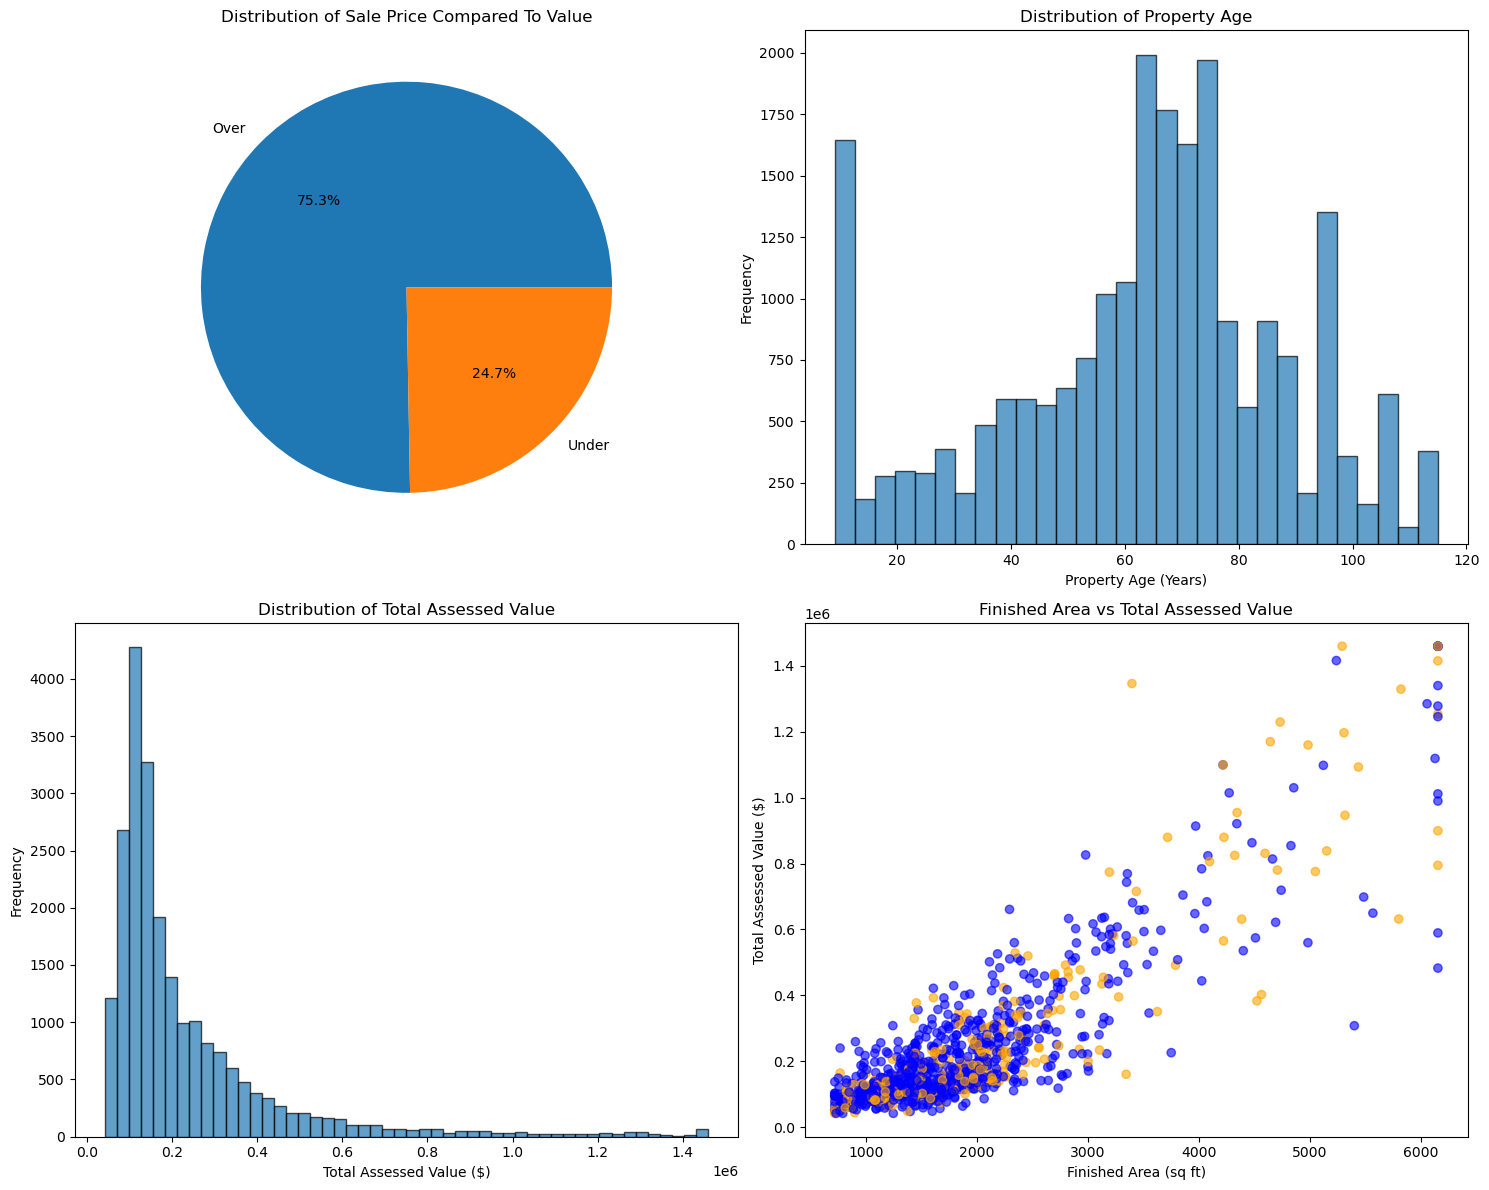

In [28]:
# visualize variables compared value 
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
target_col = 'Sale Price Compared To Value'
# Plot 1: Target variable distribution
axes[0,0].pie(df[target_col].value_counts().values, 
              labels=df[target_col].value_counts().index,
              autopct='%1.1f%%')
axes[0,0].set_title('Distribution of Sale Price Compared To Value')

# Plot 2: Property age distribution
axes[0,1].hist(df['Property Age'], bins=30, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Distribution of Property Age')
axes[0,1].set_xlabel('Property Age (Years)')
axes[0,1].set_ylabel('Frequency')

# Plot 3: Total Assessed Value distribution
axes[1,0].hist(df['Total_Assessed_Value'], bins=50, edgecolor='black', alpha=0.7)
axes[1,0].set_title('Distribution of Total Assessed Value')
axes[1,0].set_xlabel('Total Assessed Value ($)')
axes[1,0].set_ylabel('Frequency')

# Plot 4: Relationship between key features
scatter_data = df.sample(n=min(1000, len(df)))  # Sample for readability
colors = ['blue' if x == 'Over' else 'orange' for x in scatter_data[target_col]]
axes[1,1].scatter(scatter_data['Finished Area'], scatter_data['Total_Assessed_Value'], 
                  c=colors, alpha=0.6)
axes[1,1].set_title('Finished Area vs Total Assessed Value')
axes[1,1].set_xlabel('Finished Area (sq ft)')
axes[1,1].set_ylabel('Total Assessed Value ($)')

plt.tight_layout()
plt.show()

In [29]:
# encode categorical variables
categorical_cols = ['Land Use', 'Foundation Type', 'Exterior Wall', 'Grade', 
                   'Sold As Vacant', 'Tax District', 'Neighborhood']

label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[f'{col}_Encoded'] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"  - Encoded {col}")

  - Encoded Land Use
  - Encoded Foundation Type
  - Encoded Exterior Wall
  - Encoded Grade
  - Encoded Sold As Vacant
  - Encoded Tax District
  - Encoded Neighborhood


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22643 entries, 0 to 22650
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Parcel ID                          22643 non-null  object  
 1   Land Use                           22643 non-null  object  
 2   Property Address                   22643 non-null  object  
 3   Sale Date                          22643 non-null  object  
 4   Legal Reference                    22643 non-null  object  
 5   Sold As Vacant                     22643 non-null  object  
 6   Multiple Parcels Involved in Sale  22643 non-null  object  
 7   City                               22643 non-null  object  
 8   Acreage                            22643 non-null  float64 
 9   Tax District                       22643 non-null  object  
 10  Neighborhood                       22643 non-null  category
 11  Finished Area                      22643 non-n

In [31]:
# correlations
numeric_features = ['Total_Assessed_Value', 
                   'Finished Area', 'Property Age', 'Bedrooms', 'Total Bathrooms', 
                   'Acreage', 'Price_Per_SqFt']
encoded_features = ['Land Use_Encoded', 'Foundation Type_Encoded', 'Exterior Wall_Encoded',
                   'Grade_Encoded', 'Sold As Vacant_Encoded', 'Tax District_Encoded', 'Neighborhood_Encoded']

In [32]:
all_features = numeric_features + encoded_features + ['Price_Over_Value_Binary']
correlation_matrix = df[all_features].corr()

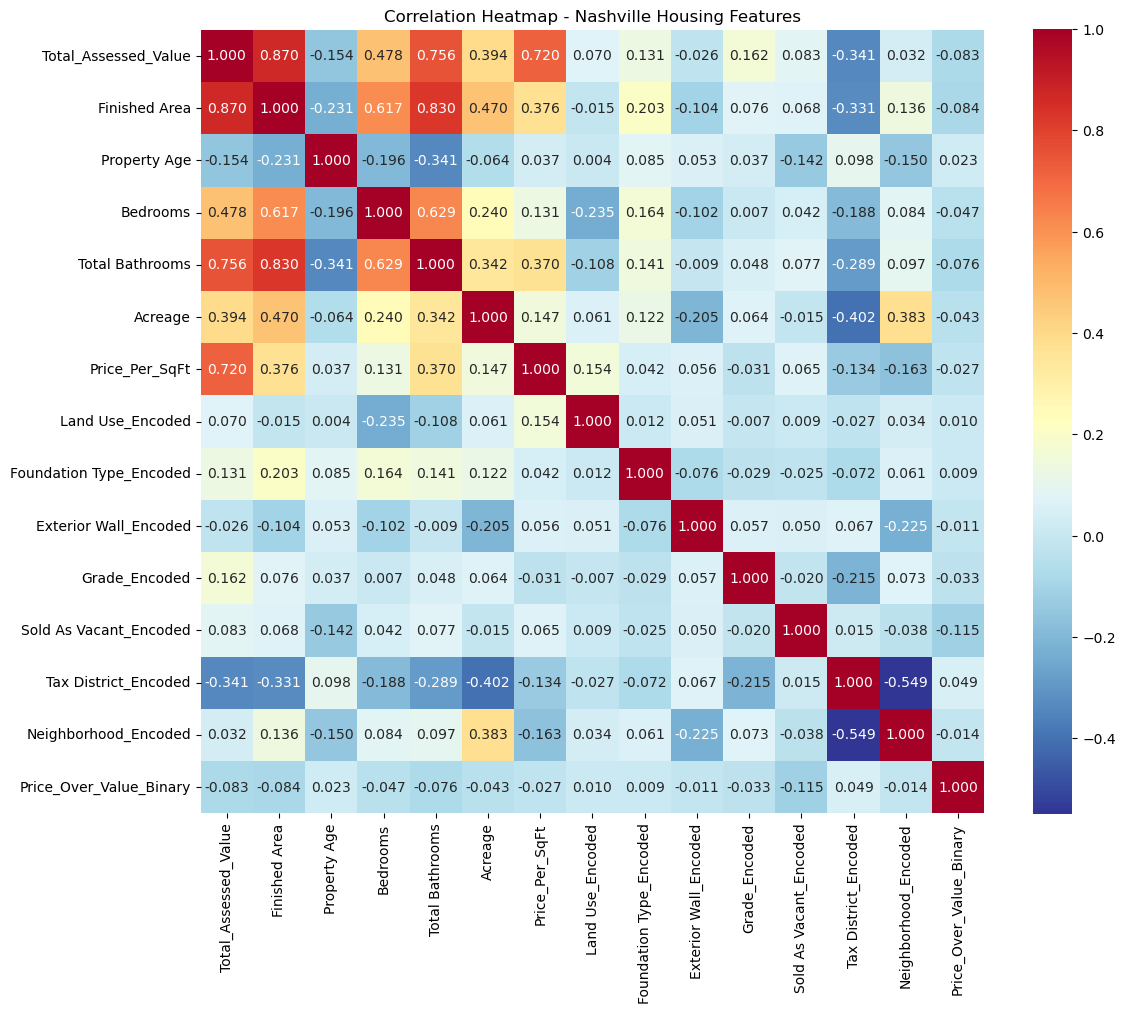

In [33]:
#heat map 
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlBu_r',
            square=True,
            fmt='.3f')
plt.title('Correlation Heatmap - Nashville Housing Features')
plt.tight_layout()
plt.show()

In [34]:
target_correlations = df[all_features].corr()['Price_Over_Value_Binary'].sort_values(ascending=False)
print("Correlations with Price Over Value (including encoded features):")
print(target_correlations)

Correlations with Price Over Value (including encoded features):
Price_Over_Value_Binary    1.000000
Tax District_Encoded       0.048725
Property Age               0.023075
Land Use_Encoded           0.010242
Foundation Type_Encoded    0.008866
Exterior Wall_Encoded     -0.011373
Neighborhood_Encoded      -0.014245
Price_Per_SqFt            -0.026847
Grade_Encoded             -0.032576
Acreage                   -0.042789
Bedrooms                  -0.046924
Total Bathrooms           -0.076006
Total_Assessed_Value      -0.082677
Finished Area             -0.083564
Sold As Vacant_Encoded    -0.114614
Name: Price_Over_Value_Binary, dtype: float64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22643 entries, 0 to 22650
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Parcel ID                          22643 non-null  object  
 1   Land Use                           22643 non-null  object  
 2   Property Address                   22643 non-null  object  
 3   Sale Date                          22643 non-null  object  
 4   Legal Reference                    22643 non-null  object  
 5   Sold As Vacant                     22643 non-null  object  
 6   Multiple Parcels Involved in Sale  22643 non-null  object  
 7   City                               22643 non-null  object  
 8   Acreage                            22643 non-null  float64 
 9   Tax District                       22643 non-null  object  
 10  Neighborhood                       22643 non-null  category
 11  Finished Area                      22643 non-n

In [36]:
feature_columns = [
    'Finished Area', 'Property Age', 
    'Bedrooms', 'Total Bathrooms', 'Acreage', 'Price_Per_SqFt',
    'Land Use_Encoded', 'Foundation Type_Encoded', 'Exterior Wall_Encoded',
    'Grade_Encoded', 'Sold As Vacant_Encoded', 'Tax District_Encoded', 'Neighborhood_Encoded'
]

In [37]:
X = df[feature_columns]
y = df['Price_Over_Value_Binary'] 

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Target distribution in training set: \n{y_train.value_counts(normalize=True)}")

Training set shape: (18114, 13)
Test set shape: (4529, 13)
Target distribution in training set: 
Price_Over_Value_Binary
1    0.752788
0    0.247212
Name: proportion, dtype: float64


In [39]:
# Scale features (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
# Build Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
y_pred_lr = lr_model.predict(X_test_scaled)

In [42]:
# Calculate metrics
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)

In [43]:
print(f"Linear Regression Results:")
print(f"  R² Score: {lr_r2:.4f}")
print(f"  Mean Squared Error: {lr_mse:.4f}")
print(f"  Root Mean Squared Error: {lr_rmse:.4f}")
print(f"  Mean Absolute Error: {lr_mae:.4f}")

Linear Regression Results:
  R² Score: 0.0105
  Mean Squared Error: 0.1842
  Root Mean Squared Error: 0.4292
  Mean Absolute Error: 0.3654


In [44]:
# Feature importance (coefficients)
feature_importance_lr = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\nTop 5 Most Important Features (Linear Regression):")
print(feature_importance_lr.head())


Top 5 Most Important Features (Linear Regression):
                   Feature  Coefficient
10  Sold As Vacant_Encoded    -0.049338
0            Finished Area    -0.030844
11    Tax District_Encoded     0.014020
3          Total Bathrooms    -0.013863
2                 Bedrooms     0.009775


In [45]:
# Decision Tree 
dt_model = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=20)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=20, random_state=42)

In [46]:
y_pred_dt = dt_model.predict(X_test)

In [47]:
# Calculate metrics
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)

print(f"Decision Tree Results:")
print(f"  R² Score: {dt_r2:.4f}")
print(f"  Mean Squared Error: {dt_mse:.4f}")
print(f"  Root Mean Squared Error: {dt_rmse:.4f}")
print(f"  Mean Absolute Error: {dt_mae:.4f}")

Decision Tree Results:
  R² Score: -0.0184
  Mean Squared Error: 0.1896
  Root Mean Squared Error: 0.4354
  Mean Absolute Error: 0.3560


In [48]:
# Feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTop 5 Most Important Features (Decision Tree):")
print(feature_importance_dt.head())


Top 5 Most Important Features (Decision Tree):
                   Feature  Importance
0            Finished Area    0.207563
5           Price_Per_SqFt    0.182778
1             Property Age    0.141552
10  Sold As Vacant_Encoded    0.139951
12    Neighborhood_Encoded    0.112864


In [49]:
# Build Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10, min_samples_split=20)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [50]:
# Calculate metrics
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest Results:")
print(f"  R² Score: {rf_r2:.4f}")
print(f"  Mean Squared Error: {rf_mse:.4f}")
print(f"  Root Mean Squared Error: {rf_rmse:.4f}")
print(f"  Mean Absolute Error: {rf_mae:.4f}")

Random Forest Results:
  R² Score: 0.0391
  Mean Squared Error: 0.1789
  Root Mean Squared Error: 0.4229
  Mean Absolute Error: 0.3551


In [51]:
# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTop 5 Most Important Features (Random Forest):")
print(feature_importance_rf.head())


Top 5 Most Important Features (Random Forest):
                   Feature  Importance
0            Finished Area    0.180901
5           Price_Per_SqFt    0.165345
1             Property Age    0.158139
12    Neighborhood_Encoded    0.120976
10  Sold As Vacant_Encoded    0.114223


In [52]:
# Build Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=6, learning_rate=0.1)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

In [53]:
# Calculate metrics
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)
gb_rmse = np.sqrt(gb_mse)

print(f"Gradient Boosting Results:")
print(f"  R² Score: {gb_r2:.4f}")
print(f"  Mean Squared Error: {gb_mse:.4f}")
print(f"  Root Mean Squared Error: {gb_rmse:.4f}")
print(f"  Mean Absolute Error: {gb_rmse:.4f}")

Gradient Boosting Results:
  R² Score: 0.0323
  Mean Squared Error: 0.1801
  Root Mean Squared Error: 0.4244
  Mean Absolute Error: 0.4244


In [54]:
# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTop 5 Most Important Features (Gradient Booting):")
print(feature_importance_rf.head())


Top 5 Most Important Features (Gradient Booting):
                 Feature  Importance
5         Price_Per_SqFt    0.216596
0          Finished Area    0.176343
12  Neighborhood_Encoded    0.135025
1           Property Age    0.134024
4                Acreage    0.104770


In [55]:
results_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'R² Score': [lr_r2, dt_r2, rf_r2, gb_r2],
    'RMSE': [lr_rmse, dt_rmse, rf_rmse, gb_rmse],
    'MAE': [lr_mae, dt_mae, rf_mae, gb_mae],
    'MSE': [lr_mse, dt_mse, rf_mse, gb_mse]
})

print("=" * 80)
print("COMPREHENSIVE MODEL COMPARISON")
print("=" * 80)
print(results_comparison.round(4))

COMPREHENSIVE MODEL COMPARISON
               Model  R² Score    RMSE     MAE     MSE
0  Linear Regression    0.0105  0.4292  0.3654  0.1842
1      Decision Tree   -0.0184  0.4354  0.3560  0.1896
2      Random Forest    0.0391  0.4229  0.3551  0.1789
3  Gradient Boosting    0.0323  0.4244  0.3531  0.1801


In [56]:
models = {
    'Linear Regression': lr_model,
    'Decision Tree': dt_model, 
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

In [57]:
cv_results = {}
for name, model in models.items():
    if name == 'Linear Regression':
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    cv_results[name] = cv_scores
    print(f"{name}:")
    print(f"  Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Linear Regression:
  Mean CV R²: 0.0225 (+/- 0.0077)
Decision Tree:
  Mean CV R²: -0.0035 (+/- 0.0107)
Random Forest:
  Mean CV R²: 0.0450 (+/- 0.0110)
Gradient Boosting:
  Mean CV R²: 0.0351 (+/- 0.0163)


In [58]:
def convert_to_binary(predictions, threshold=0.5):
    """Convert continuous predictions to binary (0 or 1)"""
    return (predictions > threshold).astype(int)

# Convert predictions to binary for classification metrics
y_pred_lr_binary = convert_to_binary(y_pred_lr)
y_pred_dt_binary = convert_to_binary(y_pred_dt)
y_pred_rf_binary = convert_to_binary(y_pred_rf)
y_pred_gb_binary = convert_to_binary(y_pred_gb)

predictions_dict = {
    'Linear Regression': y_pred_lr_binary,
    'Decision Tree': y_pred_dt_binary,
    'Random Forest': y_pred_rf_binary,
    'Gradient Boosting': y_pred_gb_binary
}

classification_results = []
for name, pred in predictions_dict.items():
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, zero_division=0)
    recall = recall_score(y_test, pred, zero_division=0)
    f1 = f1_score(y_test, pred, zero_division=0)
    
    classification_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

classification_df = pd.DataFrame(classification_results)
print(classification_df.round(4))

               Model  Accuracy  Precision  Recall  F1-Score
0  Linear Regression    0.7560     0.7560  0.9979    0.8603
1      Decision Tree    0.7459     0.7616  0.9642    0.8510
2      Random Forest    0.7591     0.7612  0.9909    0.8610
3  Gradient Boosting    0.7556     0.7619  0.9821    0.8581


In [59]:
# Combine all feature importances
all_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Linear_Reg_Coef': np.abs(lr_model.coef_),  # Use absolute values for comparison
    'Decision_Tree': dt_model.feature_importances_,
    'Random_Forest': rf_model.feature_importances_,
    'Gradient_Boosting': gb_model.feature_importances_
})

In [60]:
# Rank features by each model
for col in ['Linear_Reg_Coef', 'Decision_Tree', 'Random_Forest', 'Gradient_Boosting']:
    all_importances[f'{col}_Rank'] = all_importances[col].rank(ascending=False)

print(all_importances.sort_values('Random_Forest', ascending=False).head(10))

                   Feature  Linear_Reg_Coef  Decision_Tree  Random_Forest  \
0            Finished Area         0.030844       0.207563       0.180901   
5           Price_Per_SqFt         0.007019       0.182778       0.165345   
1             Property Age         0.006164       0.141552       0.158139   
12    Neighborhood_Encoded         0.002310       0.112864       0.120976   
10  Sold As Vacant_Encoded         0.049338       0.139951       0.114223   
4                  Acreage         0.002512       0.073440       0.104375   
3          Total Bathrooms         0.013863       0.044766       0.050229   
8    Exterior Wall_Encoded         0.005114       0.041603       0.023573   
2                 Bedrooms         0.009775       0.015880       0.020606   
9            Grade_Encoded         0.006722       0.021345       0.020022   

    Gradient_Boosting  Linear_Reg_Coef_Rank  Decision_Tree_Rank  \
0            0.176343                   2.0                 1.0   
5            0.216

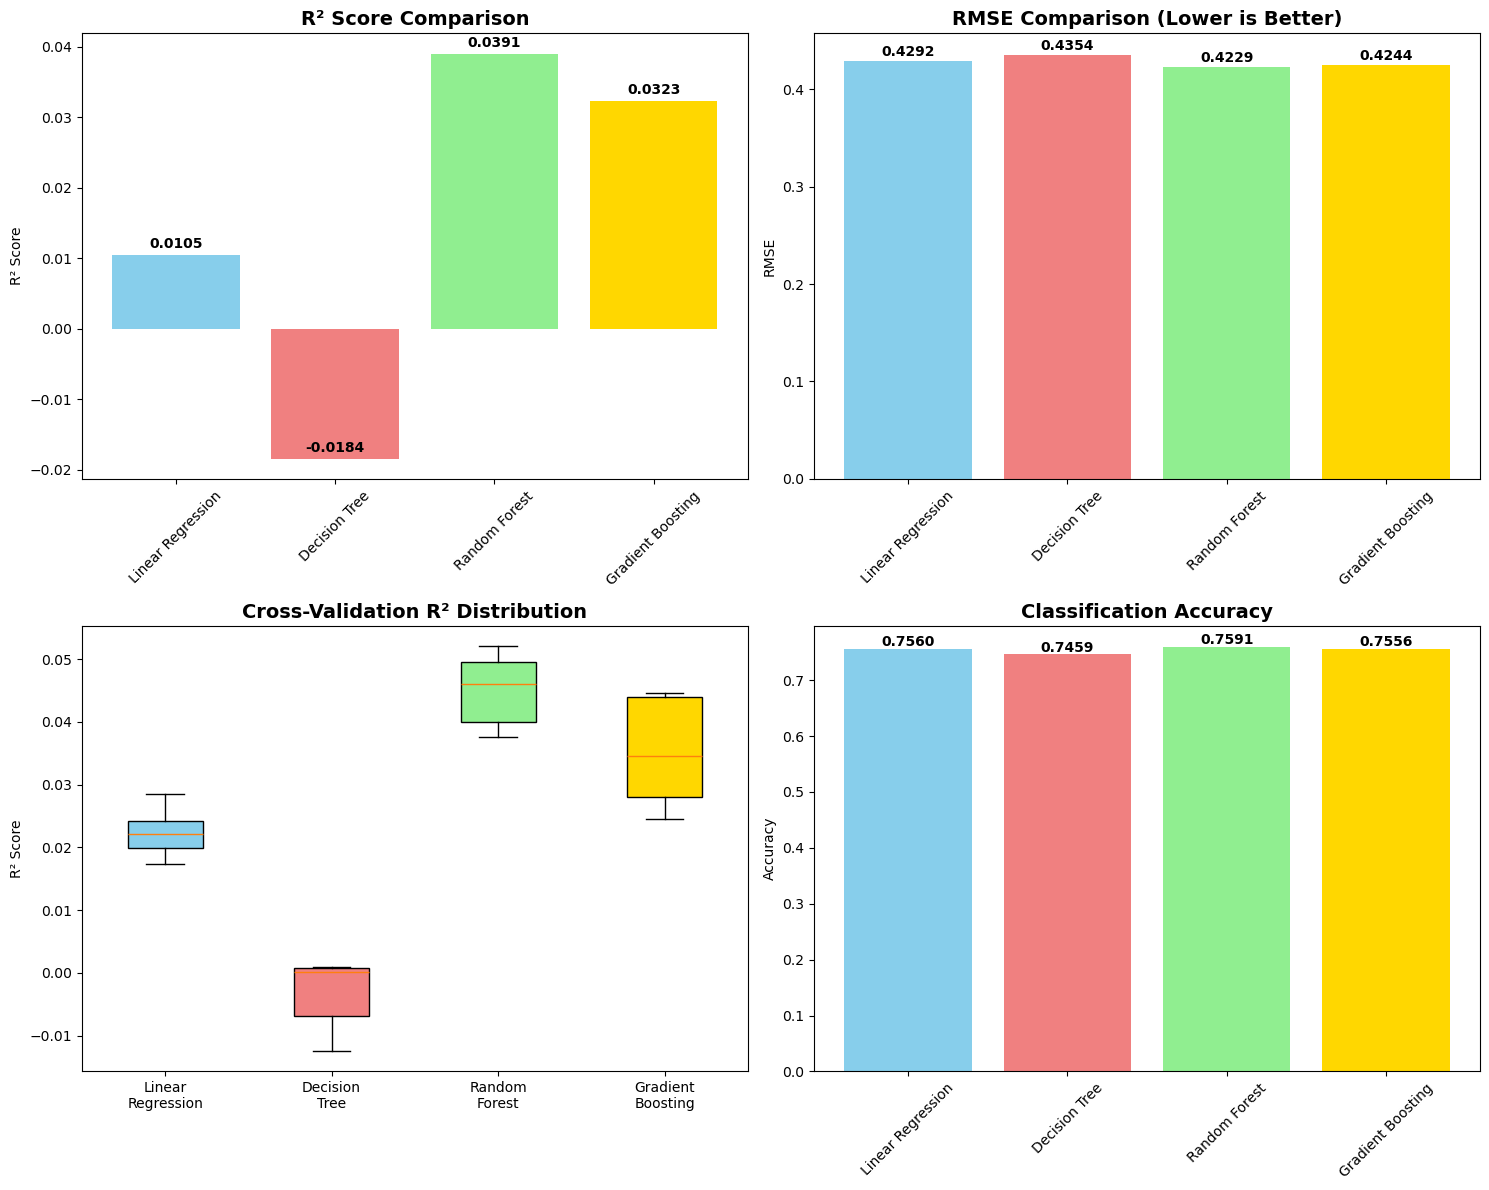

In [61]:
# Visualization of model performance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
plt.style.use('default')

# 1. R² Comparison
models_names = results_comparison['Model']
r2_scores = results_comparison['R² Score']

axes[0,0].bar(models_names, r2_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[0,0].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('R² Score')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(r2_scores):
    axes[0,0].text(i, v + 0.001, f'{v:.4f}', ha='center', fontweight='bold')

# 2. RMSE Comparison
rmse_scores = results_comparison['RMSE']
axes[0,1].bar(models_names, rmse_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[0,1].set_title('RMSE Comparison (Lower is Better)', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('RMSE')
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(rmse_scores):
    axes[0,1].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

# 3. Cross-validation box plot
cv_data = [cv_results[name] for name in models_names]
bp = axes[1,0].boxplot(cv_data, labels=[name.replace(' ', '\n') for name in models_names], patch_artist=True)
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
axes[1,0].set_title('Cross-Validation R² Distribution', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('R² Score')

# 4. Classification Accuracy
accuracy_scores = classification_df['Accuracy']
axes[1,1].bar(models_names, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
axes[1,1].set_title('Classification Accuracy', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Accuracy')
axes[1,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(accuracy_scores):
    axes[1,1].text(i, v + 0.005, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()


In [62]:
# Calculate baseline accuracy (majority class)
baseline_accuracy = max(y_test.value_counts()) / len(y_test)
print(f"Baseline Accuracy (Majority Class): {baseline_accuracy:.4f}")

Baseline Accuracy (Majority Class): 0.7527


In [63]:
# Best performing model analysis
best_r2_model = results_comparison.loc[results_comparison['R² Score'].idxmax(), 'Model']
best_accuracy_model = classification_df.loc[classification_df['Accuracy'].idxmax(), 'Model']

print(f"\nBest R² Score: {best_r2_model}")
print(f"Best Classification Accuracy: {best_accuracy_model}")


Best R² Score: Random Forest
Best Classification Accuracy: Random Forest


In [64]:
# Confusion matrix for best model
print(f"\nCONFUSION MATRIX - Random Forest Model:")
cm = confusion_matrix(y_test, y_pred_rf_binary)
print(cm)
print(f"\nInterpretation:")
print(f"• True Negatives (Under-valued correctly predicted): {cm[0,0]}")
print(f"• False Positives (Under-valued predicted as Over-valued): {cm[0,1]}")
print(f"• False Negatives (Over-valued predicted as Under-valued): {cm[1,0]}")  
print(f"• True Positives (Over-valued correctly predicted): {cm[1,1]}")


CONFUSION MATRIX - Random Forest Model:
[[  60 1060]
 [  31 3378]]

Interpretation:
• True Negatives (Under-valued correctly predicted): 60
• False Positives (Under-valued predicted as Over-valued): 1060
• False Negatives (Over-valued predicted as Under-valued): 31
• True Positives (Over-valued correctly predicted): 3378


In [65]:
# Calculate potential business impact
total_properties = len(y_test)
undervalued_properties = (y_test == 0).sum()
correctly_identified_undervalued = cm[0,0]

print(f"\nBUSINESS IMPACT ANALYSIS:")
print(f"• Total test properties: {total_properties}")
print(f"• Actually undervalued properties: {undervalued_properties}")
print(f"• Correctly identified undervalued: {correctly_identified_undervalued}")
print(f"• Success rate for finding deals: {correctly_identified_undervalued/undervalued_properties:.1%}")


BUSINESS IMPACT ANALYSIS:
• Total test properties: 4529
• Actually undervalued properties: 1120
• Correctly identified undervalued: 60
• Success rate for finding deals: 5.4%
